In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from pathlib import Path

data_path = Path('./data')

%matplotlib inline

In [2]:
data = pd.read_csv(data_path / 'house.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
agrup = data.groupby('condition').agg({
    'sqft_living' : 'mean',
    'sqft_lot' : 'mean'
})
agrup

,sqft_living,sqft_lot
condition,,
1,1325.000000,19718.000000
2,1526.875000,39597.812500
3,2218.987478,14164.930783
4,1986.699681,15969.862620
5,2108.618391,14293.544828


Leyendas con ax.legend

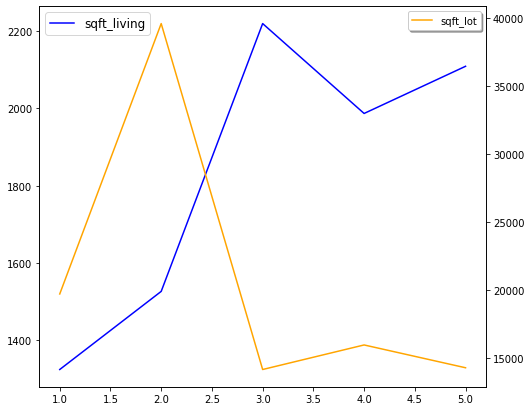

In [5]:
fig, ax = plt.subplots(figsize = (8,7))

ax.plot(agrup['sqft_living'], label = 'sqft_living', color = 'blue')

ax1 = ax.twinx()
ax1.plot(agrup['sqft_lot'], label = 'sqft_lot', color = 'orange')

#Personalizacion de leyendas.
ax.legend(loc = 'upper left', fontsize = 12)
ax1.legend(loc = 'upper right', shadow = True)

Leyendas con plt.legend

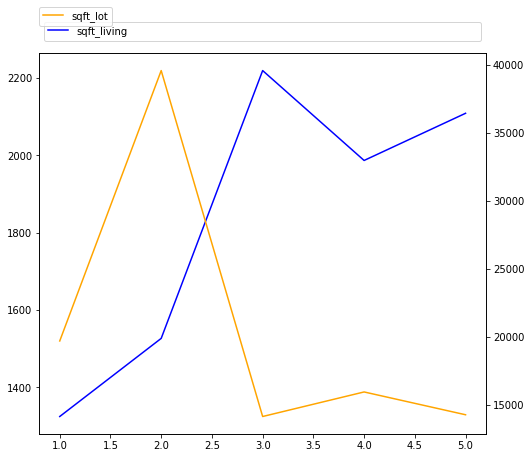

In [7]:
fig, ax = plt.subplots(figsize = (8,7))

ax.plot(agrup['sqft_living'], label = 'sqft_living', color = 'blue')
#Personalizacion de leyenda de otra forma.
plt.legend(bbox_to_anchor=(0.,1.02,1.,.102), loc='lower left', ncol=2, mode='expand')
ax1 = ax.twinx()
ax1.plot(agrup['sqft_lot'], label = 'sqft_lot', color = 'orange')
#Se repite la forma.
plt.legend(bbox_to_anchor=(0.,1.02,1.,.102), loc='upper left', ncol=2, mode=None, borderaxespad=0.)



Leyendas con mpatches

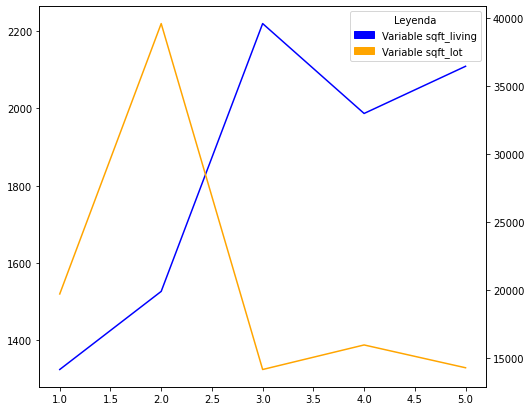

In [8]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize = (8,7))

ax.plot(agrup['sqft_living'], label = 'sqft_living', color = 'blue')

ax1 = ax.twinx()
ax1.plot(agrup['sqft_lot'], label = 'sqft_lot', color = 'orange')

sqft_living = mpatches.Patch(color='blue', label='Variable sqft_living')
sqft_lot = mpatches.Patch(color='orange', label='Variable sqft_lot')

plt.legend(handles=[sqft_living, sqft_lot], title='Leyenda')